In [1]:
import requests
import os
from bs4 import BeautifulSoup
import json, codecs
headers = {
    #'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
    #'Cookie': 'izbirkomSession=d9f8facd-439e-4a09-b9aa-1e85b643bd83; JSESSIONID=b02782c466b6e7b98e342c5ecda1'
}

In [13]:
url = 'https://www.rik.parlament.gov.rs'
r = requests.get(url+'/542645/rezultati/')
#r.encoding = 'utf-8'
#r.text
os.getcwd()

'/mnt/f/_repos/vybory/2023-serbija'

In [14]:
r.cookies.get_dict()

{'PHPSESSID': '6rmh91nlm6ujud761dal6bkriv'}

In [19]:
def req_load(should_update_pies,type,election_round,region,municipality,election_station):
    return {
        'should_update_pies':str(should_update_pies),
        'type':str(type),
        'election_round':str(election_round),
        'region':str(region),
        'municipality':str(municipality),
        'election_station':str(election_station),
    }
req_load(1,0,0,0,0,0)

{'should_update_pies': '1',
 'type': '0',
 'election_round': '0',
 'region': '0',
 'municipality': '0',
 'election_station': '0'}

In [18]:
def kwfoo(**params):
    for k,v in params.items():
        print(type(k),k,type(v),v)
kwfoo(a=1,b=2)

<class 'str'> a <class 'int'> 1
<class 'str'> b <class 'int'> 2


In [ ]:
GET /542645/rezultati/ HTTP/2
Host: www.rik.parlament.gov.rs
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:120.0) Gecko/20100101 Firefox/120.0
Accept-Language: ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Connection: keep-alive
TE: trailers

Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8
Upgrade-Insecure-Requests: 1
Sec-Fetch-Dest: document
Sec-Fetch-Site: none
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1

-----------------------
POST /get_results/ HTTP/2
Host: 
User-Agent: 
Accept-Language: 
Accept-Encoding: 
Connection: 
TE:

Accept: application/json, text/javascript, */*; q=0.01
Referer: https://www.rik.parlament.gov.rs/
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
X-Requested-With: XMLHttpRequest
Origin: https://www.rik.parlament.gov.rs
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin

Sec-Fetch-Dest: document
Content-Length: 87
Cookie: PHPSESSID=e539v2ktulmd200hjarolq46s9

-----------------------
POST /get-elections/ HTTP/2

Host: www.rik.parlament.gov.rs
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:120.0) Gecko/20100101 Firefox/120.0
Accept-Language: ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Connection: keep-alive
TE: trailers

Accept: application/json, text/javascript, */*; q=0.01
Referer: https://www.rik.parlament.gov.rs/
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
X-Requested-With: XMLHttpRequest
Origin: https://www.rik.parlament.gov.rs
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin

Sec-Fetch-Dest: empty
Content-Length: 15
Cookie: PHPSESSID=e539v2ktulmd200hjarolq46s9

-----------------------
POST /get_results/ HTTP/2

Host: www.rik.parlament.gov.rs
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:120.0) Gecko/20100101 Firefox/120.0
Accept-Language: ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Connection: keep-alive
TE: trailers

Accept: application/json, text/javascript, */*; q=0.01
Referer: https://www.rik.parlament.gov.rs/
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
X-Requested-With: XMLHttpRequest
Origin: https://www.rik.parlament.gov.rs
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin

Sec-Fetch-Dest: empty
Content-Length: 87
Cookie: PHPSESSID=e539v2ktulmd200hjarolq46s9

In [115]:
common_headers = {
    'Host': 'www.rik.parlament.gov.rs',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:120.0) Gecko/20100101 Firefox/120.0',
    'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'TE': 'trailers',
}
get_headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-User': '?1',
}
post_headers = {
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Referer': 'https://www.rik.parlament.gov.rs/',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Origin': 'https://www.rik.parlament.gov.rs',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
}
post_doc_headers = {'Sec-Fetch-Dest': 'document'}
post_empty_headers = {'Sec-Fetch-Dest': 'empty'}


In [85]:
r0 = requests.get(url+'/542645/rezultati/',headers= common_headers|get_headers)
r0

<Response [200]>

In [86]:
r0.text
soup = BeautifulSoup(r0.text)
soup.head

<head>
<title>Републичка изборна комисија</title>
<meta content="" name="keywords"/>
<meta content="" name="description"/>
<meta content="ite.gov.rs" name="author"/>
<meta content="index,follow" name="robots"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="" property="og:title">
<meta content="website" property="og:type"/>
<meta content="https://www.rik.parlament.gov.rs/542645/rezultati/" property="og:url"/>
<meta content="https://www.rik.parlament.gov.rs/img/facebook-logo-cr.jpg" property="og:image"/>
<meta content="" property="og:site_name"/>
<meta content="" property="og:description"/>
<link href="/css/minified.6589995ab8da5.css" rel="stylesheet"/>
<script src="/js/vendor/jquery-2.2.4.min.js"></script>
<script src="/js/jquery-ui.min.js"></script>
<link href="/css/bootstrap-table.min.css" rel="stylesheet"/>
<script src="/js/bootstrapTable/bootstrap-table.js"></script>
<script src="/js/bootstrapTable/bootstrap-table-filt

In [87]:
r0.cookies.get_dict()

{'PHPSESSID': '1kso955hhn24kf8qndf1lq1l3o'}

In [88]:
r1 = requests.post(url+'/get_results/',headers= common_headers|post_headers|post_doc_headers, cookies=r0.cookies.get_dict())
r1

<Response [200]>

In [89]:
r1.json()

{'processed_config': {'type': 'pie',
  'data': {'datasets': [{'data': [1, 1],
     'backgroundColor': ['#0d4077', '#869FBB']}],
   'labels': ['Уписано', 'Изашло']},
  'options': {'refresh': False,
   'tooltips': {'enabled': False},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'sum_config': {'type': 'pie',
  'data': {'datasets': [{'data': [1, 1],
     'backgroundColor': ['#0d4077', '#FF0200']}],
   'labels': ['Важећи листићи', 'Неважећи листићи']},
  'options': {'refresh': False,
   'tooltips': {'enabled': False},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'minute_from_election_station': '',
 'stat_sum_numbers': {'available': 0,
  'number_of_stations': 0,
  'table_have_image': 0,
  'datetime': '-',
  'election_title': ''},
 'table_data': []}

In [135]:
r2 = requests.post(url+'/get-elections/', data={'election_type':	"2"}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())
r2

<Response [200]>

In [137]:
r2.json()

{'rounds': {'341140': 'Парламентарни 2023'}}

In [92]:
r3 = requests.post(url+'/get_results/',data=req_load(0,2,0,0,0,0), headers= common_headers|post_headers|post_doc_headers, cookies=r0.cookies.get_dict())
r3

<Response [200]>

In [93]:
r3.json()

{'processed_config': {'type': 'pie',
  'data': {'datasets': [{'data': [1, 1],
     'backgroundColor': ['#0d4077', '#869FBB']}],
   'labels': ['Уписано', 'Изашло']},
  'options': {'refresh': False,
   'tooltips': {'enabled': False},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'sum_config': {'type': 'pie',
  'data': {'datasets': [{'data': [1, 1],
     'backgroundColor': ['#0d4077', '#FF0200']}],
   'labels': ['Важећи листићи', 'Неважећи листићи']},
  'options': {'refresh': False,
   'tooltips': {'enabled': False},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'minute_from_election_station': '',
 'stat_sum_numbers': {'available': 0,
  'number_of_stations': 0,
  'table_have_image': 0,
  'datetime': '-',
  'election_title': ''},
 'table_data': []}

In [124]:
r3 = requests.post(url+'/get_results/',data=req_load(1,2,341140,0,0,0), headers= common_headers|post_headers|post_doc_headers, cookies=r0.cookies.get_dict())
r3

<Response [200]>

In [125]:
r3.json()

{'processed_config': {'type': 'pie',
  'data': {'datasets': [{'data': [2668389, 3812734],
     'backgroundColor': ['#0d4077', '#869FBB']}],
   'labels': ['Није изашло (41.18%)', 'Изашло (58.82%)']},
  'options': {'refresh': True,
   'tooltips': {'enabled': True},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'sum_config': {'type': 'pie',
  'data': {'datasets': [{'data': [3703090, 103906],
     'backgroundColor': ['#0d4077', '#FF0200']}],
   'labels': ['Важећи листићи (97.27%)', 'Неважећи листићи (2.73%)']},
  'options': {'refresh': True,
   'tooltips': {'enabled': True},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'minute_from_election_station': '',
 'stat_sum_numbers': {'available': '3.812.734',
  'number_of_stations': '8.273',
  'table_have_image': False,
  'datetime': '28.12.2023 14:56:00',
  'election_title': 'Парламен

In [167]:
r3 = requests.post(url+'/get_results/',data=req_load(1,2,341140,1,1,159106), headers= common_headers|post_headers|post_doc_headers, cookies=r0.cookies.get_dict())
if r3: 
    print(r3.json()['stat_sum_numbers'])
else:
    print(r3)

{'available': '489', 'number_of_stations': 1, 'table_have_image': False, 'datetime': '28.12.2023 18:56:00', 'election_title': 'Парламентарни 2023', 'total_voters': '860', 'processed_stations': 1}


In [171]:
r3.json()

{'processed_config': {'type': 'pie',
  'data': {'datasets': [{'data': [371, 489],
     'backgroundColor': ['#0d4077', '#869FBB']}],
   'labels': ['Није изашло (43.14%)', 'Изашло (56.86%)']},
  'options': {'refresh': True,
   'tooltips': {'enabled': True},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'sum_config': {'type': 'pie',
  'data': {'datasets': [{'data': [476, 13],
     'backgroundColor': ['#0d4077', '#FF0200']}],
   'labels': ['Важећи листићи (97.34%)', 'Неважећи листићи (2.66%)']},
  'options': {'refresh': True,
   'tooltips': {'enabled': True},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'minute_from_election_station': "\n            <div class=''><span>Записник о раду бирачког одбора (Образац РГ-2)</span></div>\n            <div class='table-file active'><a href='/extfile/sr/election_results/657f76128a648/@ПА6_

In [ ]:
comed = int(r3.json()['processed_config']['data']['datasets'][0]['data'][1])
not_comed = int(r3.json()['processed_config']['data']['datasets'][0]['data'][0])
voted = int(r3.json()['sum_config']['data']['datasets'][0]['data'][0])
bad = int(r3.json()['sum_config']['data']['datasets'][0]['data'][1])
total = int(r3.json()['stat_sum_numbers']['total_voters'])
assert comed==int(r3.json()['stat_sum_numbers']['available'])
assert r3.json()['stat_sum_numbers']['number_of_stations']==r3.json()['stat_sum_numbers']['processed_stations']
assert comed+not_comed == total
assert voted+bad == comed

voters = [int(entry['won_number']) for entry in r3.json()['table_data'] ]
can = [entry['list_name'] for entry in r3.json()['table_data'] ]
assert can == candidates_list
assert sum(voters)==voted

In [140]:
r2 = requests.post(url+'/get-regions/', data={'election_type':'2','election_round':'341140'}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())
r2

<Response [200]>

In [142]:
r2.json()['regions']

{'1': 'Београдски регион',
 '100': 'Заводи за извршење кривичних санкција',
 '101': 'Иностранство',
 '2': 'Регион Војводине',
 '4': 'Регион Јужне и Источне Србије',
 '5': 'Регион Косово и Метохија',
 '3': 'Регион Шумадије и Западне Србије'}

In [150]:
r2 = requests.post(url+'/get-municipalities/', data={'election_type':'2','election_round':'341140','election_region':'1'}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())
r2

<Response [200]>

In [151]:
r2.json()['municipalities']

{'1': 'Градска општина Барајево',
 '2': 'Градска општина Вождовац',
 '3': 'Градска општина Врачар ',
 '4': 'Градска општина Гроцка',
 '6': 'Градска општина Звездара ',
 '5': 'Градска општина Земун',
 '7': 'Градска општина Лазаревац',
 '8': 'Градска општина Младеновац',
 '9': 'Градска општина Нови Београд',
 '10': 'Градска општина Обреновац',
 '11': 'Градска општина Палилула (Београд)',
 '12': 'Градска општина Раковица',
 '13': 'Градска општина Савски Венац',
 '14': 'Градска општина Сопот',
 '15': 'Градска општина Стари Град',
 '16': 'Градска општина Сурчин',
 '17': 'Градска општина Чукарица'}

In [152]:
r2 = requests.post(url+'/get-election-stations/', data={'election_type':'2','election_round':'341140','election_region':'1','election_municipality':'1'}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())
r2

<Response [200]>

In [154]:
r2.json()['election_stations']

{'159091': '1 - МК "АРНАЈЕВО"',
 '159094': '2 - СКУПШТИНА ОПШТИНЕ - ВЕЛИКА САЛА',
 '159097': '3 - ЛОВАЧКИ ДОМ',
 '159100': '4 - ОШ "РАВНИ ГАЈ" ',
 '159103': '5 - ОШ "СРЕДЊИ КРАЈ" ',
 '159106': '6 - ОШ "ГЛУМЧЕВО БРДО"',
 '159109': '7 - МЕСНА ЗАЈЕДНИЦА "ГЛУМЧЕВО БРДО" - ЛИПОВИЦА',
 '159112': '8 - ДОМ КУЛТУРЕ ',
 '159115': '9 - СПОРТСКО ДРУШТВО',
 '159118': '10 - ДОМ КУЛТУРЕ',
 '159121': '11 - ДОМ КУЛТУРЕ',
 '159124': '12 - ДОМ КУЛТУРЕ',
 '159127': '13 - ЛОКАЛ - БИВШИ ФРИЗЕРСКИ САЛОН',
 '159130': '14 - ЗДРАВСТВЕНА СТАНИЦА',
 '159133': '15 - СПОМЕН ДОМ',
 '159136': '16 - КАФЕ "ПАЛМА"',
 '159139': '17 - ФК ВРАНИЋ',
 '159142': '18 - МЕСНА ЗАЈЕДНИЦА - НАСЕЉЕ "ГАЈ"',
 '159145': '19 - ЛОКАЛ - АУТО СЕРВИС СМОЛИЋ',
 '159148': '20 - ОСНОВНА ШКОЛА',
 '159151': '21 - МК "ЛИСОВИЋ"',
 '159154': '22 - ДОМ КУЛТУРЕ - СПАСОВИНА',
 '159157': '23 - ДОМ КУЛТУРЕ',
 '159160': '24 - МЕСНА ЗАЈЕДНИЦА "МЕЉАК"',
 '159163': '25 - МК "РОЖАНЦИ"',
 '159166': '26 - ДОМ КУЛТУРЕ',
 '159169': '27 - ДК "БАРАЈЕВО"',
 '159172

In [155]:
reg_mun_st = []

In [157]:
regs = requests.post(url+'/get-regions/', data={'election_type':'2','election_round':'341140'}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())


In [158]:
regs.json()['regions']

{'1': 'Београдски регион',
 '100': 'Заводи за извршење кривичних санкција',
 '101': 'Иностранство',
 '2': 'Регион Војводине',
 '4': 'Регион Јужне и Источне Србије',
 '5': 'Регион Косово и Метохија',
 '3': 'Регион Шумадије и Западне Србије'}

In [205]:
import time
reg_mun_st = []
for reg,reg_name in regs.json()['regions'].items():
    muns = requests.post(url+'/get-municipalities/', data={'election_type':'2','election_round':'341140','election_region':reg}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())
    if muns.status_code !=200:
        print(reg,reg_name)
        continue
    for mun,mun_name in muns.json()['municipalities'].items():
        print(' : ',reg,reg_name,mun,mun_name)
        sts = requests.post(url+'/get-election-stations/', data={'election_type':'2','election_round':'341140','election_region':reg,'election_municipality':mun}, headers= common_headers|post_headers|post_empty_headers, cookies=r0.cookies.get_dict())
        if sts.status_code !=200:
            print(reg,reg_name,mun,mun_name)
            continue
        for st,st_name in sts.json()['election_stations'].items():
            reg_mun_st.append((reg,reg_name,mun,mun_name,st,st_name))
            time.sleep(0.05)

 :  1 Београдски регион 1 Градска општина Барајево
 :  1 Београдски регион 2 Градска општина Вождовац
 :  1 Београдски регион 3 Градска општина Врачар 
 :  1 Београдски регион 4 Градска општина Гроцка
 :  1 Београдски регион 6 Градска општина Звездара 
 :  1 Београдски регион 5 Градска општина Земун
 :  1 Београдски регион 7 Градска општина Лазаревац
 :  1 Београдски регион 8 Градска општина Младеновац
 :  1 Београдски регион 9 Градска општина Нови Београд
 :  1 Београдски регион 10 Градска општина Обреновац
 :  1 Београдски регион 11 Градска општина Палилула (Београд)
 :  1 Београдски регион 12 Градска општина Раковица
 :  1 Београдски регион 13 Градска општина Савски Венац
 :  1 Београдски регион 14 Градска општина Сопот
 :  1 Београдски регион 15 Градска општина Стари Град
 :  1 Београдски регион 16 Градска општина Сурчин
 :  1 Београдски регион 17 Градска општина Чукарица
 :  100 Заводи за извршење кривичних санкција 169 Заводи за извршење кривичних санкција
 :  101 Иностранство 19

In [206]:
len(set(reg_mun_st))

8238

In [207]:
reg_mun_st

[('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159091',
  '1 - МК "АРНАЈЕВО"'),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159094',
  '2 - СКУПШТИНА ОПШТИНЕ - ВЕЛИКА САЛА'),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159097',
  '3 - ЛОВАЧКИ ДОМ'),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159100',
  '4 - ОШ "РАВНИ ГАЈ" '),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159103',
  '5 - ОШ "СРЕДЊИ КРАЈ" '),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159106',
  '6 - ОШ "ГЛУМЧЕВО БРДО"'),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159109',
  '7 - МЕСНА ЗАЈЕДНИЦА "ГЛУМЧЕВО БРДО" - ЛИПОВИЦА'),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159112',
  '8 - ДОМ КУЛТУРЕ '),
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159115',
  '9 - СПОРТСКО ДРУШТВО'),
 ('1',
  'Беогр

In [173]:
candidates_list = [
'1. ИЗБОРНА ЛИСТА АЛЕКСАНДАР ВУЧИЋ - СРБИЈА НЕ СМЕ ДА СТАНЕ',
'2. ИЗБОРНА ЛИСТА ИВИЦА ДАЧИЋ – ПРЕМИЈЕР СРБИЈЕ',
'3. ИЗБОРНА ЛИСТА ДР ВОЈИСЛАВ ШЕШЕЉ - СРПСКА РАДИКАЛНА СТРАНКА',
'4. ИЗБОРНА ЛИСТА МИЛИЦА ЂУРЂЕВИЋ СТАМЕНКОВСКИ - БОШКО ОБРАДОВИЋ - НАЦИОНАЛНО ОКУПЉАЊЕ - ДРЖАВОТВОРНА СНАГА - СРПСКА СТРАНКА ЗАВЕТНИЦИ - СРПСКИ ПОКРЕТ ДВЕРИ',
'5. ИЗБОРНА ЛИСТА ДР МИЛОШ ЈОВАНОВИЋ – НАДА ЗА СРБИЈУ – СРПСКА КОАЛИЦИЈА НАДА – НАЦИОНАЛНО ДЕМОКРАТСКА АЛТЕРНАТИВА – НОВА ДЕМОКРАТСКА СТРАНКА СРБИЈЕ ( НOВИ ДСС) – ПОКРЕТ ОБНОВЕ КРАЉЕВИНЕ СРБИЈЕ (ПОКС) – ВОЈИСЛАВ МИХАИЛОВИЋ',
'6. ИЗБОРНА ЛИСТА VАJDASÁGI MAGYAR SZÖVETSÉG – ELNÖKÜNKÉRT, KÖZÖSSÉGÜNKÉRT, A JÖVŐÉRT! – САВЕЗ ВОЈВОЂАНСКИХ МАЂАРА – ЗА НАШЕГ ПРЕДСЕДНИКА, ЗА НАШУ ЗАЈЕДНИЦУ, ЗА БУДУЋНОСТ!',
'7. ИЗБОРНА ЛИСТА СРБИЈА ПРОТИВ НАСИЉА – МИРОСЛАВ МИКИ АЛЕКСИЋ - МАРИНИКА ТЕПИЋ (СТРАНКА СЛОБОДЕ И ПРАВДЕ, НАРОДНИ ПОКРЕТ СРБИЈЕ, ЗЕЛЕНО-ЛЕВИ ФРОНТ, НЕ ДАВИМО БЕОГРАД, ЕКОЛОШКИ УСТАНАК – ЋУТА, ДЕМОКРАТСКА СТРАНКА, ПОКРЕТ СЛОБОДНИХ ГРАЂАНА, СРБИЈА ЦЕНТАР, ЗАЈЕДНО, ПОКРЕТ ЗА ПРЕОКРЕТ, УДРУЖЕНИ СИНДИКАТИ СРБИЈЕ „СЛОГА“, НОВО ЛИЦЕ СРБИЈЕ)',
'8. ИЗБОРНА ЛИСТА USAME ZUKORLIĆ – UJEDINJENI ZA PRAVDU – STRANKA PRAVDE I POMIRENJA – BOŠNJACI SANDŽAKA, TOMISLAV ŽIGMANOV - DEMOKRATSKI SAVEZ HRVATA U VOJVODINI / УСАМЕ ЗУКОРЛИЋ – УЈЕДИЊЕНИ ЗА ПРАВДУ – СТРАНКА ПРАВДЕ И ПОМИРЕЊА – БОШЊАЦИ САНЏАКА, ТОМИСЛАВ ЖИГМАНОВ - ДЕМОКРАТСКИ САВЕЗ ХРВАТА У ВОЈВОДИНИ',
'9. ИЗБОРНА ЛИСТА СДА САНЏАКА - ДР СУЛЕЈМАН УГЉАНИН SDA SANDŽAKA – DR. SULEJMAN UGLJANIN',
'10. ИЗБОРНА ЛИСТА ЗАЈЕДНО ЗА БУДУЋНОСТ И РАЗВОЈ – КОАЛИЦИЈА ЗА МИР И ТОЛЕРАНЦИЈУ',
'11. ИЗБОРНА ЛИСТА НАРОДНА СТРАНКА – СИГУРАН ИЗБОР. ОЗБИЉНИ ЉУДИ – ВУК ЈЕРЕМИЋ, ДР САНДА РАШКОВИЋ ИВИЋ, СИНИША КОВАЧЕВИЋ, ВЛАДИМИР ГАЈИЋ, МАРИНА ЛИПОВАЦ ТАНАСКОВИЋ',
'12. ИЗБОРНА ЛИСТА САША РАДУЛОВИЋ (ДОСТА ЈЕ БИЛО - ДЈБ) - БОРИС ТАДИЋ (СОЦИЈАЛДЕМОКРАТСКА СТРАНКА - СДС) - АНА ПЕЈИЋ (ОТЕТЕ БЕБЕ) - ДОБРО ЈУТРО СРБИЈО',
'13. ИЗБОРНА ЛИСТА “ПОЛИТИЧКА БОРБА АЛБАНАЦА СЕ НАСТАВЉА – ШАИП КАМБЕРИ“ “BETEJA POLITIKE E SHQIPTARËVE VAZHDON – SHAIP KAMBERI”',
'14. ИЗБОРНА ЛИСТА МИ-ГЛАС ИЗ НАРОДА, ПРОФ. ДР БРАНИМИР НЕСТОРОВИЋ\t',
'15. ИЗБОРНА ЛИСТА СРБИЈА НА ЗАПАДУ – ЗОРАН ВУЛЕТИЋ – НЕМАЊА МИЛОШЕВИЋ – ДА СЕ СТРУКА ПИТА – ВЛАДИМИР КОВАЧЕВИЋ',
'16. ИЗБОРНА ЛИСТА РУСКА СТРАНКА – СЛОБОДАН НИКОЛИЋ',
'17. ИЗБОРНА ЛИСТА ЧЕДОМИР ЈОВАНОВИЋ – МОРА ДРУГАЧИЈЕ',
'18. ИЗБОРНА ЛИСТА АЛБАНСКА ДЕМОКРАТСКА АЛТЕРНАТИВА – УЈЕДИЊЕНА ДОЛИНА ALTERNATIVA DEMOKRATIKE SHQIPTARE-LUGINA E BASHKUAR',

]

In [223]:
reg_mun_st.index(('3', 'Регион Шумадије и Западне Србије', '132', 'Варварин', '178147', '12 - МЕСНА ЗАЈЕДНИЦА'))

5743

In [224]:
#results = {}
for reg,reg_name,mun,mun_name,st,st_name in reg_mun_st[5743:]:
    r3 = requests.post(url+'/get_results/',data=req_load(1,2,341140,reg,mun,st), headers= common_headers|post_headers|post_doc_headers, cookies=r0.cookies.get_dict())

    try:
        total = int(r3.json()['stat_sum_numbers']['total_voters'].replace('.',''))
        if total==0:
            print('nul: ',reg,reg_name,mun,mun_name,st,st_name)
            continue

        comed = int(r3.json()['processed_config']['data']['datasets'][0]['data'][1])
        not_comed = int(r3.json()['processed_config']['data']['datasets'][0]['data'][0])
        voted = int(r3.json()['sum_config']['data']['datasets'][0]['data'][0])
        bad = int(r3.json()['sum_config']['data']['datasets'][0]['data'][1])
        assert comed==int(r3.json()['stat_sum_numbers']['available'].replace('.',''))
        assert r3.json()['stat_sum_numbers']['number_of_stations']==r3.json()['stat_sum_numbers']['processed_stations']
        assert comed+not_comed == total
        #assert voted+bad == comed
        
        voters = [int(entry['won_number'].replace('.','')) for entry in r3.json()['table_data'] ]
        can = [entry['list_name'] for entry in r3.json()['table_data'] ]
        assert can == candidates_list
        assert sum(voters)==voted

        results[(reg,reg_name,mun,mun_name,st,st_name)] = [total,comed,voted,voters] # формат сохранения
        print('OK: ',reg,reg_name,mun,mun_name,st,st_name)
    except Exception as e:
        print('bad: ',reg,reg_name,mun,mun_name,st,st_name)
        break



OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178147 12 - МЕСНА ЗАЈЕДНИЦА
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178150 13 - МЕСНА ЗАЈЕДНИЦА
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178153 14 - ОШ "ЈОВАН КУРСУЛА" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178156 15 - ОШ "ЈОВАН КУРСУЛА" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178159 16 - ОШ "ЈОВАН КУРСУЛА" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178162 17 - ОШ "ХЕРОЈ МИРКО ТОМИЋ" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178165 18 - СЕОСКИ ДОМ
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178168 19 - ОШ "ЈОВАН КУРСУЛА" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178171 20 - ОШ "ХЕРОЈ МИРКО ТОМИЋ" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178174 21 - ОШ "ХЕРОЈ МИРКО ТОМИЋ" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178177 22 - ОШ "ХЕРОЈ МИРКО ТОМИЋ" 
OK:  3 Регион Шумадије и Западне Србије 132 Варварин 178180 23 - З

In [214]:
        total = int(r3.json()['stat_sum_numbers']['total_voters'].replace('.',''))
        if total==0:
            print('nul: ',reg,reg_name,mun,mun_name,st,st_name)

        comed = int(r3.json()['processed_config']['data']['datasets'][0]['data'][1])
        not_comed = int(r3.json()['processed_config']['data']['datasets'][0]['data'][0])
        voted = int(r3.json()['sum_config']['data']['datasets'][0]['data'][0])
        bad = int(r3.json()['sum_config']['data']['datasets'][0]['data'][1])
        assert comed==int(r3.json()['stat_sum_numbers']['available'])
        assert r3.json()['stat_sum_numbers']['number_of_stations']==r3.json()['stat_sum_numbers']['processed_stations']
        assert comed+not_comed == total
        assert voted+bad == comed
        
        voters = [int(entry['won_number']) for entry in r3.json()['table_data'] ]
        can = [entry['list_name'] for entry in r3.json()['table_data'] ]
        assert can == candidates_list
        assert sum(voters)==voted

        results[(reg,reg_name,mun,mun_name,st,st_name)] = [total,comed,voted,voters]
        print('OK: ',reg,reg_name,mun,mun_name,st,st_name)

AssertionError: 

In [216]:
r3.json()

{'processed_config': {'type': 'pie',
  'data': {'datasets': [{'data': [626, 780],
     'backgroundColor': ['#0d4077', '#869FBB']}],
   'labels': ['Није изашло (44.53%)', 'Изашло (55.47%)']},
  'options': {'refresh': True,
   'tooltips': {'enabled': True},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'sum_config': {'type': 'pie',
  'data': {'datasets': [{'data': [758, 19],
     'backgroundColor': ['#0d4077', '#FF0200']}],
   'labels': ['Важећи листићи (97.55%)', 'Неважећи листићи (2.45%)']},
  'options': {'refresh': True,
   'tooltips': {'enabled': True},
   'responsive': True,
   'aspectRatio': 2.75,
   'legend': {'onClick': '', 'position': 'left', 'labels': {'boxWidth': 12}}}},
 'minute_from_election_station': "\n            <div class=''><span>Записник о раду бирачког одбора (Образац РГ-2)</span></div>\n            <div class='table-file active'><a href='/extfile/sr/election_results/657fa0d8a814c/@ПА7_

In [217]:
voted

758

In [218]:
bad

19

In [219]:
comed

780

In [225]:
len(results)

8238

In [226]:
results

{('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159091',
  '1 - МК "АРНАЈЕВО"'): [624,
  362,
  346,
  [176, 23, 1, 15, 12, 0, 90, 2, 0, 1, 2, 3, 0, 21, 0, 0, 0, 0]],
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159094',
  '2 - СКУПШТИНА ОПШТИНЕ - ВЕЛИКА САЛА'): [1335,
  712,
  693,
  [315, 58, 14, 22, 36, 1, 182, 1, 0, 0, 6, 14, 0, 42, 0, 1, 0, 1]],
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159097',
  '3 - ЛОВАЧКИ ДОМ'): [564,
  320,
  309,
  [166, 10, 6, 8, 30, 1, 62, 1, 0, 1, 6, 4, 0, 14, 0, 0, 0, 0]],
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159100',
  '4 - ОШ "РАВНИ ГАЈ" '): [712,
  418,
  406,
  [213, 33, 8, 22, 18, 1, 84, 0, 0, 1, 2, 4, 0, 19, 0, 1, 0, 0]],
 ('1',
  'Београдски регион',
  '1',
  'Градска општина Барајево',
  '159103',
  '5 - ОШ "СРЕДЊИ КРАЈ" '): [715,
  394,
  388,
  [218, 33, 8, 16, 21, 2, 63, 0, 0, 0, 1, 4, 0, 19, 0, 3, 0, 0]],
 ('1',
  'Београдски регион',


In [232]:
import matplotlib.pyplot as plt

In [173]:
candidates_list = [
'1. ИЗБОРНА ЛИСТА АЛЕКСАНДАР ВУЧИЋ - СРБИЈА НЕ СМЕ ДА СТАНЕ',
'2. ИЗБОРНА ЛИСТА ИВИЦА ДАЧИЋ – ПРЕМИЈЕР СРБИЈЕ',
'3. ИЗБОРНА ЛИСТА ДР ВОЈИСЛАВ ШЕШЕЉ - СРПСКА РАДИКАЛНА СТРАНКА',
'4. ИЗБОРНА ЛИСТА МИЛИЦА ЂУРЂЕВИЋ СТАМЕНКОВСКИ - БОШКО ОБРАДОВИЋ - НАЦИОНАЛНО ОКУПЉАЊЕ - ДРЖАВОТВОРНА СНАГА - СРПСКА СТРАНКА ЗАВЕТНИЦИ - СРПСКИ ПОКРЕТ ДВЕРИ',
'5. ИЗБОРНА ЛИСТА ДР МИЛОШ ЈОВАНОВИЋ – НАДА ЗА СРБИЈУ – СРПСКА КОАЛИЦИЈА НАДА – НАЦИОНАЛНО ДЕМОКРАТСКА АЛТЕРНАТИВА – НОВА ДЕМОКРАТСКА СТРАНКА СРБИЈЕ ( НOВИ ДСС) – ПОКРЕТ ОБНОВЕ КРАЉЕВИНЕ СРБИЈЕ (ПОКС) – ВОЈИСЛАВ МИХАИЛОВИЋ',
'6. ИЗБОРНА ЛИСТА VАJDASÁGI MAGYAR SZÖVETSÉG – ELNÖKÜNKÉRT, KÖZÖSSÉGÜNKÉRT, A JÖVŐÉRT! – САВЕЗ ВОЈВОЂАНСКИХ МАЂАРА – ЗА НАШЕГ ПРЕДСЕДНИКА, ЗА НАШУ ЗАЈЕДНИЦУ, ЗА БУДУЋНОСТ!',
'7. ИЗБОРНА ЛИСТА СРБИЈА ПРОТИВ НАСИЉА – МИРОСЛАВ МИКИ АЛЕКСИЋ - МАРИНИКА ТЕПИЋ (СТРАНКА СЛОБОДЕ И ПРАВДЕ, НАРОДНИ ПОКРЕТ СРБИЈЕ, ЗЕЛЕНО-ЛЕВИ ФРОНТ, НЕ ДАВИМО БЕОГРАД, ЕКОЛОШКИ УСТАНАК – ЋУТА, ДЕМОКРАТСКА СТРАНКА, ПОКРЕТ СЛОБОДНИХ ГРАЂАНА, СРБИЈА ЦЕНТАР, ЗАЈЕДНО, ПОКРЕТ ЗА ПРЕОКРЕТ, УДРУЖЕНИ СИНДИКАТИ СРБИЈЕ „СЛОГА“, НОВО ЛИЦЕ СРБИЈЕ)',
'8. ИЗБОРНА ЛИСТА USAME ZUKORLIĆ – UJEDINJENI ZA PRAVDU – STRANKA PRAVDE I POMIRENJA – BOŠNJACI SANDŽAKA, TOMISLAV ŽIGMANOV - DEMOKRATSKI SAVEZ HRVATA U VOJVODINI / УСАМЕ ЗУКОРЛИЋ – УЈЕДИЊЕНИ ЗА ПРАВДУ – СТРАНКА ПРАВДЕ И ПОМИРЕЊА – БОШЊАЦИ САНЏАКА, ТОМИСЛАВ ЖИГМАНОВ - ДЕМОКРАТСКИ САВЕЗ ХРВАТА У ВОЈВОДИНИ',
'9. ИЗБОРНА ЛИСТА СДА САНЏАКА - ДР СУЛЕЈМАН УГЉАНИН SDA SANDŽAKA – DR. SULEJMAN UGLJANIN',
'10. ИЗБОРНА ЛИСТА ЗАЈЕДНО ЗА БУДУЋНОСТ И РАЗВОЈ – КОАЛИЦИЈА ЗА МИР И ТОЛЕРАНЦИЈУ',
'11. ИЗБОРНА ЛИСТА НАРОДНА СТРАНКА – СИГУРАН ИЗБОР. ОЗБИЉНИ ЉУДИ – ВУК ЈЕРЕМИЋ, ДР САНДА РАШКОВИЋ ИВИЋ, СИНИША КОВАЧЕВИЋ, ВЛАДИМИР ГАЈИЋ, МАРИНА ЛИПОВАЦ ТАНАСКОВИЋ',
'12. ИЗБОРНА ЛИСТА САША РАДУЛОВИЋ (ДОСТА ЈЕ БИЛО - ДЈБ) - БОРИС ТАДИЋ (СОЦИЈАЛДЕМОКРАТСКА СТРАНКА - СДС) - АНА ПЕЈИЋ (ОТЕТЕ БЕБЕ) - ДОБРО ЈУТРО СРБИЈО',
'13. ИЗБОРНА ЛИСТА “ПОЛИТИЧКА БОРБА АЛБАНАЦА СЕ НАСТАВЉА – ШАИП КАМБЕРИ“ “BETEJA POLITIKE E SHQIPTARËVE VAZHDON – SHAIP KAMBERI”',
'14. ИЗБОРНА ЛИСТА МИ-ГЛАС ИЗ НАРОДА, ПРОФ. ДР БРАНИМИР НЕСТОРОВИЋ\t',
'15. ИЗБОРНА ЛИСТА СРБИЈА НА ЗАПАДУ – ЗОРАН ВУЛЕТИЋ – НЕМАЊА МИЛОШЕВИЋ – ДА СЕ СТРУКА ПИТА – ВЛАДИМИР КОВАЧЕВИЋ',
'16. ИЗБОРНА ЛИСТА РУСКА СТРАНКА – СЛОБОДАН НИКОЛИЋ',
'17. ИЗБОРНА ЛИСТА ЧЕДОМИР ЈОВАНОВИЋ – МОРА ДРУГАЧИЈЕ',
'18. ИЗБОРНА ЛИСТА АЛБАНСКА ДЕМОКРАТСКА АЛТЕРНАТИВА – УЈЕДИЊЕНА ДОЛИНА ALTERNATIVA DEMOKRATIKE SHQIPTARE-LUGINA E BASHKUAR',

]

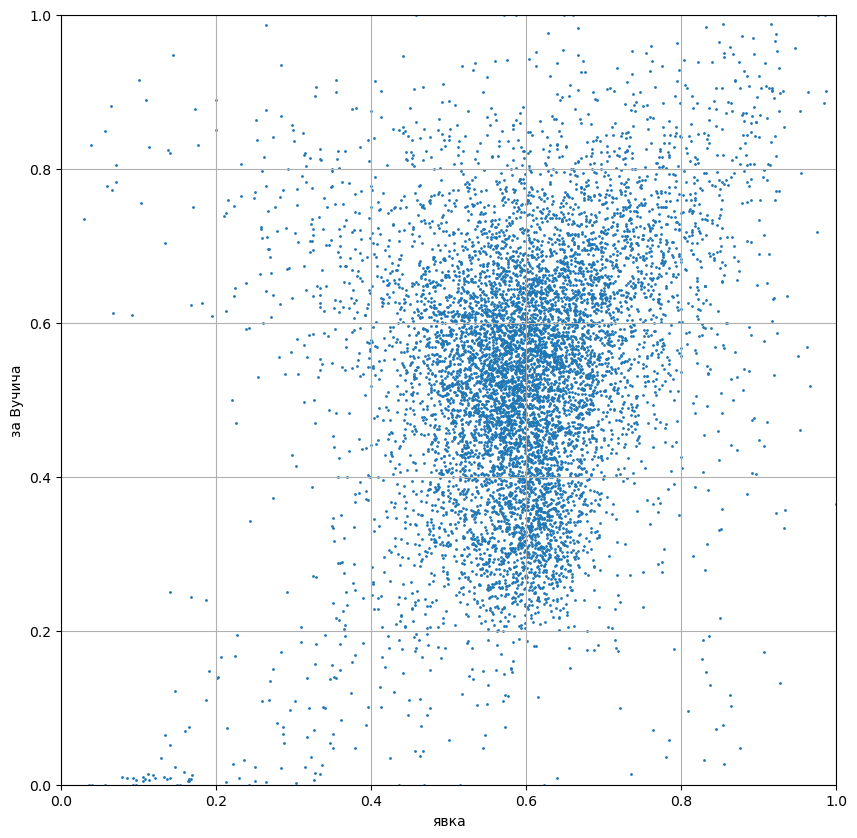

In [279]:
# [total,comed,voted,voters] # формат сохранения
javka = []
vucic = []
for k,v in results.items():
    javka.append(v[2]/v[0])
    vucic.append(v[3][0]/v[2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim (0,1)
plt.ylim (0,1)
ax.grid()
ax.set(xlabel='явка', ylabel='за Вучича')
ax.scatter(javka, vucic,1)
plt.savefig('Вучич.png')

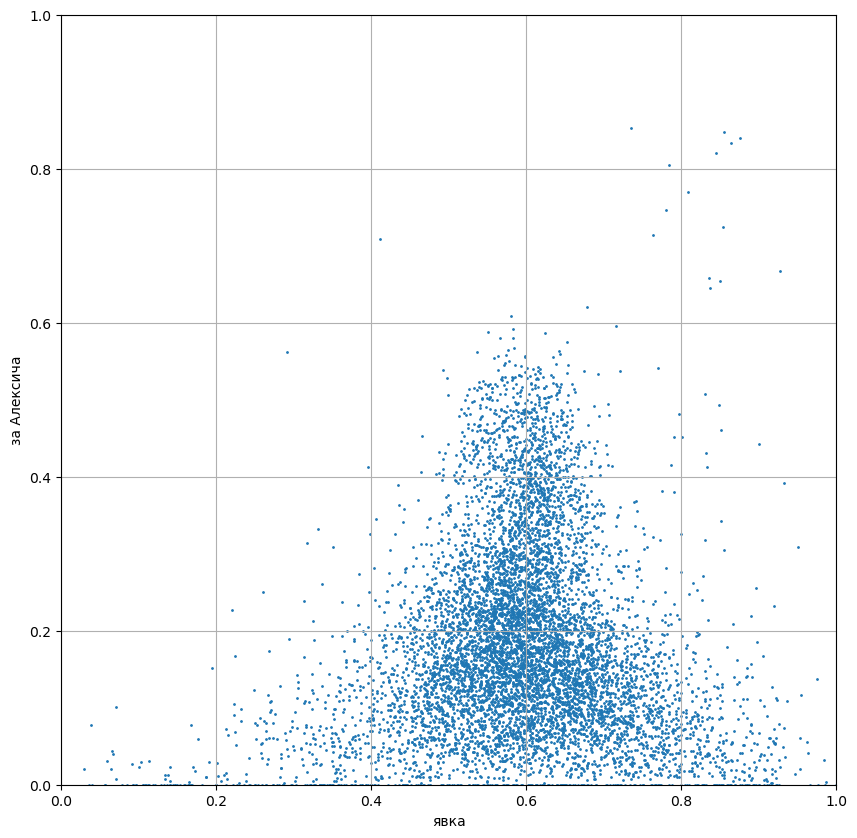

In [280]:
# [total,comed,voted,voters] # формат сохранения
javka = []
vucic = []
for k,v in results.items():
    javka.append(v[2]/v[0])
    vucic.append(v[3][6]/v[2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim (0,1)
plt.ylim (0,1)
ax.grid()
ax.set(xlabel='явка', ylabel='за Алексича')
ax.scatter(javka, vucic,1)
plt.savefig('Алексич.png')

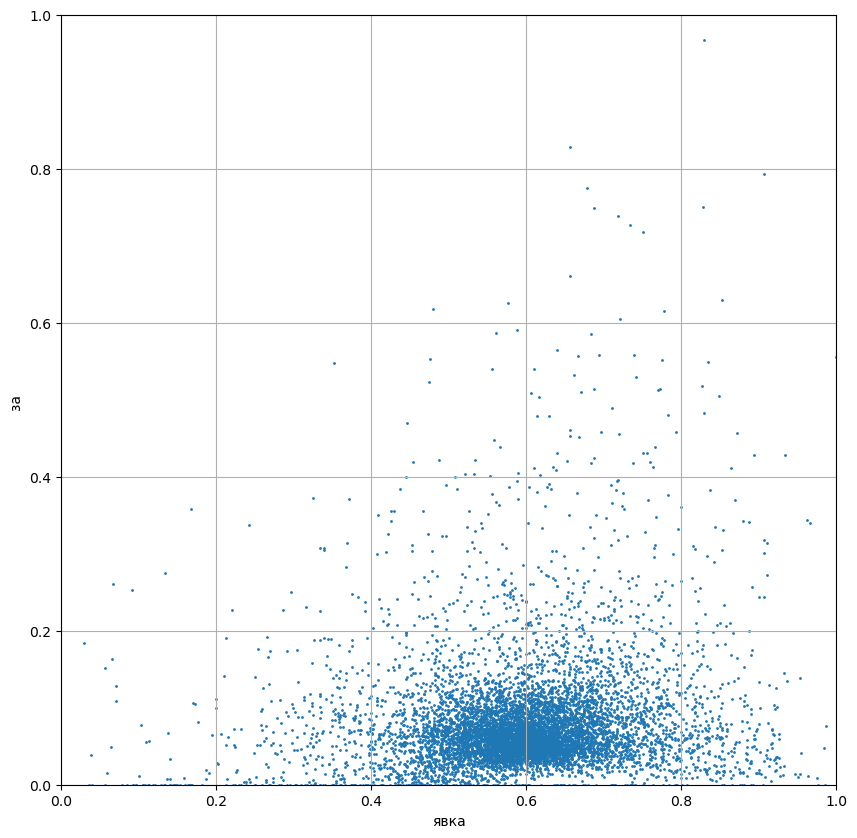

In [273]:
# [total,comed,voted,voters] # формат сохранения
javka = []
vucic = []
for k,v in results.items():
    javka.append(v[2]/v[0])
    vucic.append(v[3][1]/v[2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim (0,1)
plt.ylim (0,1)
ax.grid()
ax.set(xlabel='явка', ylabel='за ')
ax.scatter(javka, vucic,1)

In [276]:
Belgrad = {k:v for k,v in results.items() if k[0]=='1'}

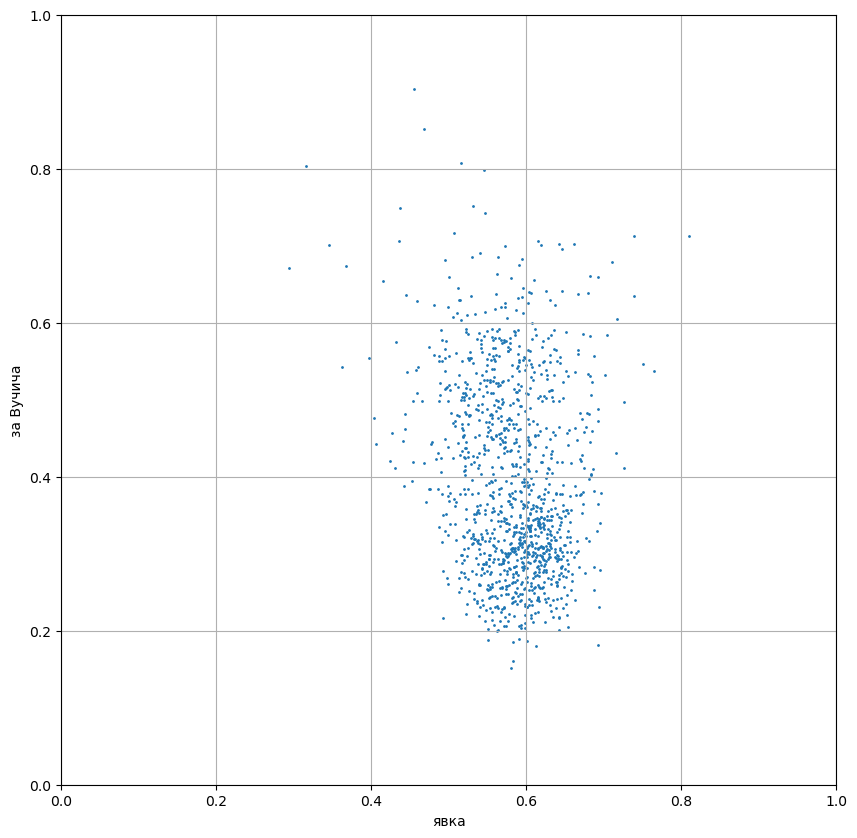

In [281]:
# [total,comed,voted,voters] # формат сохранения
javka = []
vucic = []
for k,v in Belgrad.items():
    javka.append(v[2]/v[0])
    vucic.append(v[3][0]/v[2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim (0,1)
plt.ylim (0,1)
ax.grid()
ax.set(xlabel='явка', ylabel='за Вучича')
ax.scatter(javka, vucic,1)
plt.savefig('Белград - Вучич.png')

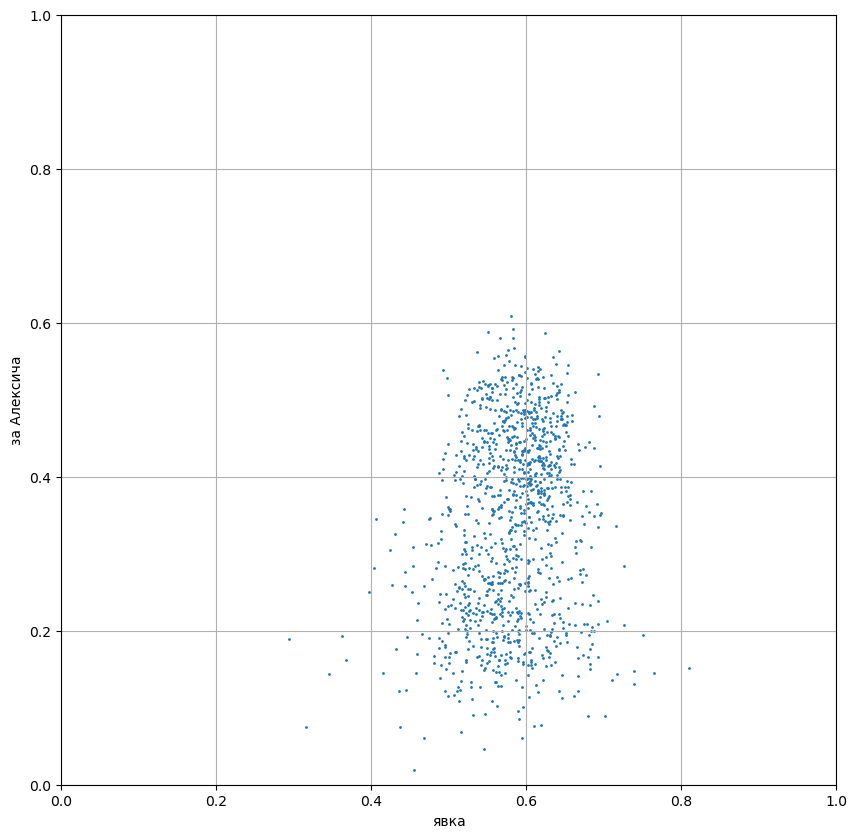

In [282]:
# [total,comed,voted,voters] # формат сохранения
javka = []
vucic = []
for k,v in Belgrad.items():
    javka.append(v[2]/v[0])
    vucic.append(v[3][6]/v[2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim (0,1)
plt.ylim (0,1)
ax.grid()
ax.set(xlabel='явка', ylabel='за Алексича')
ax.scatter(javka, vucic,1)
plt.savefig('Белград - Алексич.png')